In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**Exploring the Dataset**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Checking for Null

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There is no precence of NULL Values in the Data set but in further exploring,
It shows the precence of values as '0's in the dataset, Therefore it must be 
removed

In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [ ]:
#After replacing the 0 values as NaN 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [ ]:
for i in df.columns:
  null = df[i].isnull().sum()
  l = len(df['Glucose'])
  print(i," has ", (null/l)*100 ,"% Null values") 

Pregnancies  has  0.0 % Null values
Glucose  has  0.6510416666666667 % Null values
BloodPressure  has  4.557291666666666 % Null values
SkinThickness  has  29.557291666666668 % Null values
Insulin  has  48.69791666666667 % Null values
BMI  has  1.4322916666666665 % Null values
DiabetesPedigreeFunction  has  0.0 % Null values
Age  has  0.0 % Null values
Outcome  has  0.0 % Null values


It seems like there are a lot of Data missing as NaN in columns, 
We have to remove NaN values > 5% from the data and replace it with Mean or Mode

In [ ]:
df['SkinThickness'].mode()
df['Insulin'].mean()

155.5482233502538

In [ ]:
df[['SkinThickness']] = df[['SkinThickness']].replace(np.NaN,32)
df[['Insulin']] = df[['Insulin']].replace(np.NaN,df['Insulin'].mean())

In [ ]:
for i in df.columns:
  null = df[i].isnull().sum()
  l = len(df['Glucose'])
  print(i," has ", (null/l)*100 ,"% Null values") 

Pregnancies  has  0.0 % Null values
Glucose  has  0.6510416666666667 % Null values
BloodPressure  has  4.557291666666666 % Null values
SkinThickness  has  0.0 % Null values
Insulin  has  0.0 % Null values
BMI  has  1.4322916666666665 % Null values
DiabetesPedigreeFunction  has  0.0 % Null values
Age  has  0.0 % Null values
Outcome  has  0.0 % Null values


##Correlation Matrix

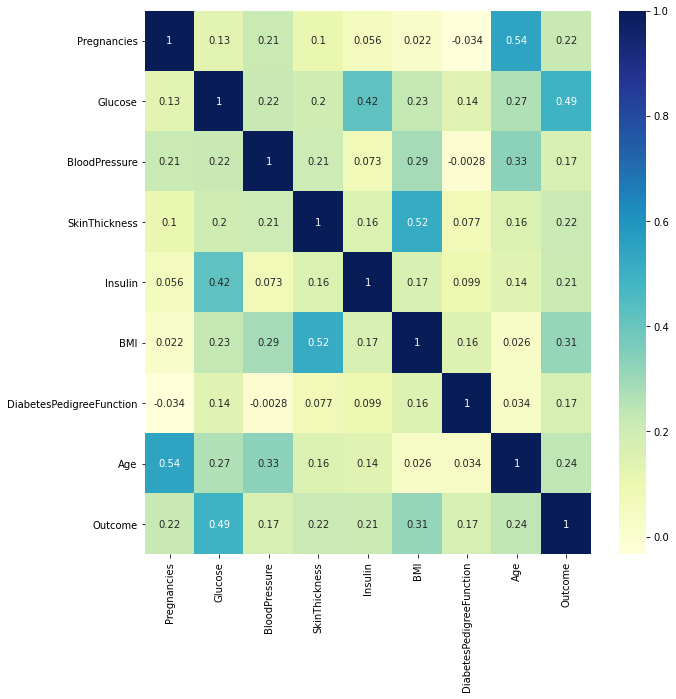

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(), cmap="YlGnBu", annot= True,)
plt.show()

From the above matrix,It is clear that there is no precence of any strong correlation in the in
the features or the out comes.

##Univariate Analysis

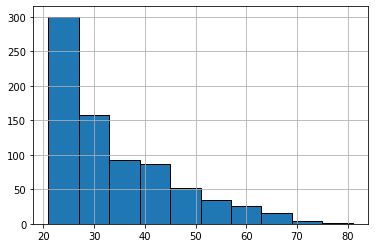

In [ ]:
#Univariate Analysis
# The histagram of the Age variable was reached.
df["Age"].hist(edgecolor = "black");

In [ ]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.7/dist-packages (0.11.1)


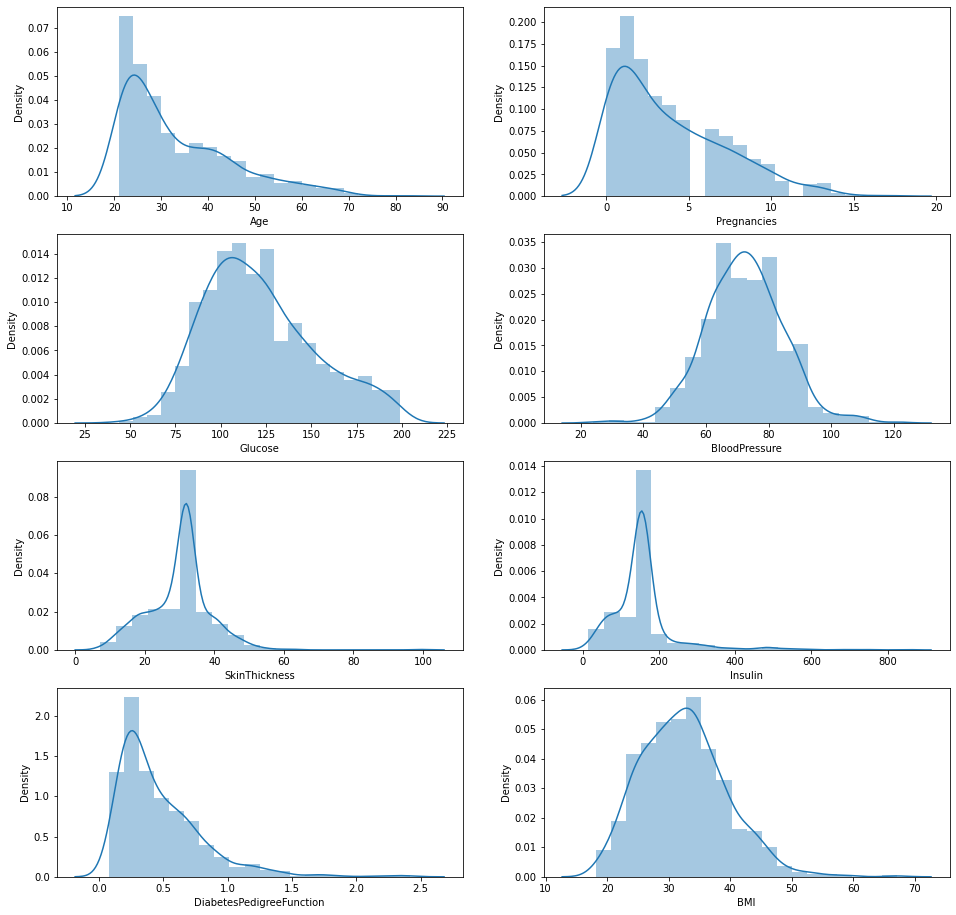

In [ ]:
# Histogram and density graphs of all variables were accessed.
fig, ax = plt.subplots(4,2, figsize=(16,16))
sns.distplot(df.Age, bins = 20, ax=ax[0,0]) 
sns.distplot(df.Pregnancies, bins = 20, ax=ax[0,1]) 
sns.distplot(df.Glucose, bins = 20, ax=ax[1,0]) 
sns.distplot(df.BloodPressure, bins = 20, ax=ax[1,1]) 
sns.distplot(df.SkinThickness, bins = 20, ax=ax[2,0])
sns.distplot(df.Insulin, bins = 20, ax=ax[2,1])
sns.distplot(df.DiabetesPedigreeFunction, bins = 20, ax=ax[3,0]) 
sns.distplot(df.BMI, bins = 20, ax=ax[3,1]) 

The abouve distribution plot shows that some of the Columns have right skewed or
left skewed data distribution and also indicates the presence of outliers.
Hence it is necessary to do outlier removal steps

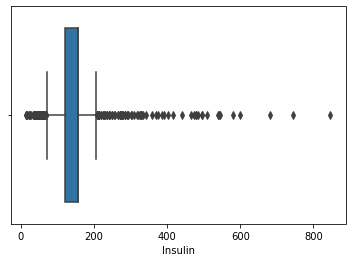

In [ ]:
sns.boxplot(x = df["Insulin"]);

In [ ]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Insulin.quantile(0.25)
Q3 = df.Insulin.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Insulin"] > upper,"Insulin"] = upper
df.loc[df["Insulin"] < lower,"Insulin"] = lower


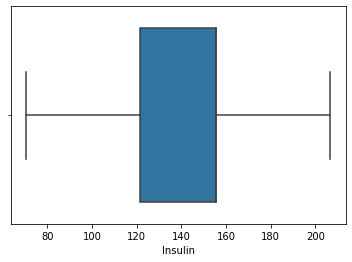

In [ ]:
sns.boxplot(x = df["Insulin"]);

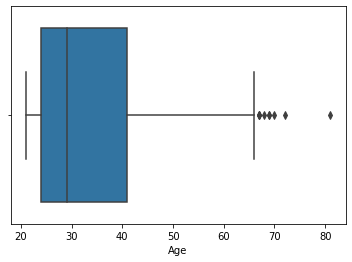

In [ ]:
sns.boxplot(x = df["Age"])

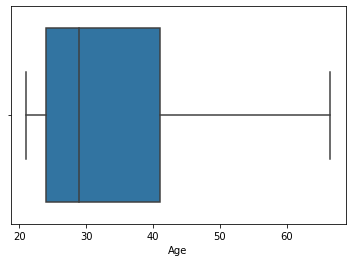

In [ ]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df["Age"] > upper,"Age"] = upper
df.loc[df["Age"] < lower,"Age"] = lower

sns.boxplot(x = df["Age"]);

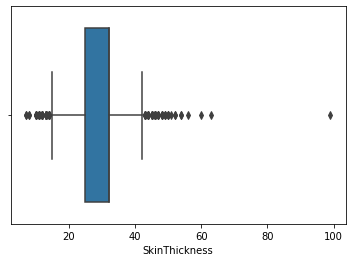

In [ ]:
sns.boxplot(x = df['SkinThickness'])

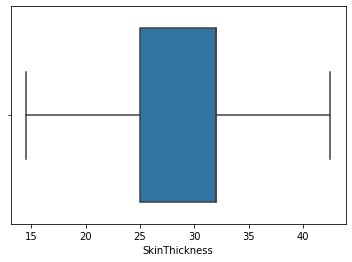

In [ ]:
#We conduct a stand alone observation review for the Insulin variable
#We suppress contradictory values
Q1 = df.SkinThickness.quantile(0.25)
Q3 = df.SkinThickness.quantile(0.75)
IQR = Q3-Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
df.loc[df['SkinThickness'] > upper,'SkinThickness'] = upper
df.loc[df["SkinThickness"] < lower,"SkinThickness"] = lower

sns.boxplot(x = df["SkinThickness"]);

##Bivariate Analysis

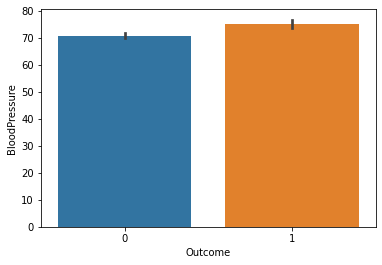

In [ ]:
sns.barplot(df['Outcome'], df['BloodPressure'])

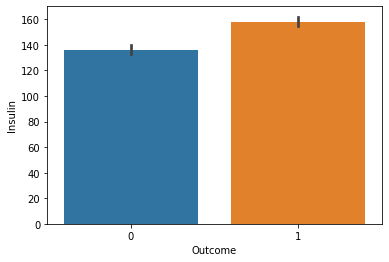

In [ ]:
sns.barplot(df['Outcome'], df['Insulin'])

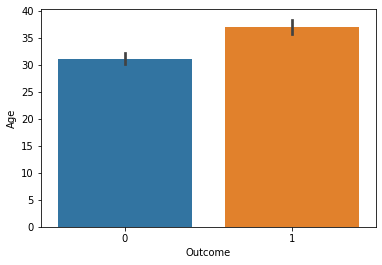

In [ ]:
sns.barplot(df['Outcome'], df['Age'])

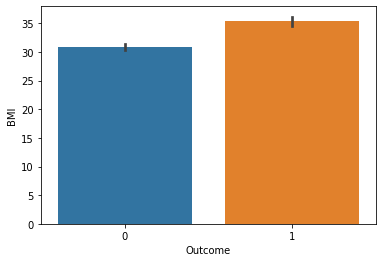

In [ ]:
sns.barplot(df['Outcome'], df['BMI'])

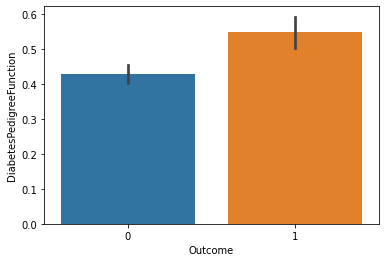

In [ ]:
sns.barplot(df['Outcome'], df['DiabetesPedigreeFunction'])

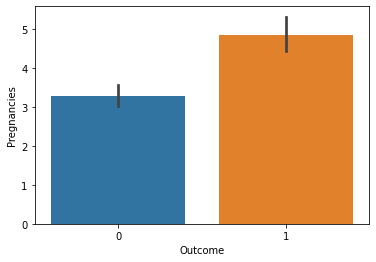

In [ ]:
sns.barplot(df['Outcome'], df['Pregnancies'])

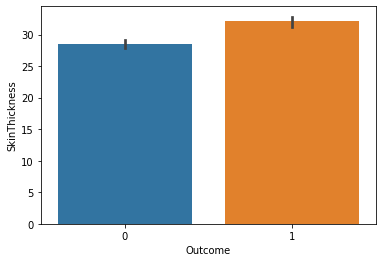

In [ ]:
sns.barplot(df['Outcome'], df['SkinThickness'])

It is clear from the above bar graphs that there is higher risk of 
of Outcome to be Diabetic for the patients who have HIGH levels of 
Glucose levels, BloodPressures, Number of Pregnancies and Thus these can be an early signals for them to be alerted and contact with the Doctors to avoid problems.

##Model Building

In [ ]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,155.548223,33.6,0.627,50.0,1
1,1,85.0,66.0,29.0,155.548223,26.6,0.351,31.0,0
2,8,183.0,64.0,32.0,155.548223,23.3,0.672,32.0,1
3,1,89.0,66.0,23.0,94.000000,28.1,0.167,21.0,0
4,0,137.0,40.0,35.0,168.000000,43.1,2.288,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,42.5,180.000000,32.9,0.171,63.0,0
764,2,122.0,70.0,27.0,155.548223,36.8,0.340,27.0,0
765,5,121.0,72.0,23.0,112.000000,26.2,0.245,30.0,0
766,1,126.0,60.0,32.0,155.548223,30.1,0.349,47.0,1


In [ ]:
df.isnull().sum()
cols_with_zero = ['Glucose','BloodPressure','BMI']
for col in cols_with_zero:
    df[col] = df[col].replace(0, np.NaN)
    mean = int(df[col].mean(skipna= True))
    df[col] = df[col].replace(np.NaN, mean)

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#Importing necessary Libraries for our Model from sk-learn api
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import minmax_scale, normalize
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
# Let's split our data into two sets, one with only dependent variable and the other with the independent variables

x = df.iloc[:,0:8]
y = df.iloc[:,8]

# splitting our data into Training & Testing data sets in the ratio of 8:2 for both dependent and independent variables
x_train,x_test, y_train,y_test = train_test_split(x,y, test_size= 0.2, random_state= 123)

In [ ]:
# Let's standardize our data to transform the data into equal scale range
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

**KNN Algorithm**:
The k-nearest neighbors (KNN) algorithm is a simple, supervised machine learning algorithm that can be used to solve both classification and regression problems. It's easy to implement and understand, but has a major drawback of becoming significantly slows as the size of that data in use grows.

In [ ]:
# Let's train our model on the Training datasets using k-NearestNeighbors (k-NN) algorithm
#Using Elbow method to determine the best number of neighbours of Clusters
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

neighbours = []
cv_scores = []

for k in range(1,51,2):
  neighbours.append(k)
  classifier = KNeighborsClassifier(n_neighbors= k, p= 2, metric= 'euclidean')
  classifier.fit(x_train,y_train)
  y_pred = classifier.predict(x_test)
  #scores = cross_val_score(classifier,x_test,y_test,cv=10,scoring='accuracy')
  acc_sc = round(accuracy_score(y_pred,y_test)*100,2)
  cv_scores.append(acc_sc)

print(cv_scores)
print(max(cv_scores))


[75.32, 79.22, 78.57, 80.52, 81.82, 79.87, 82.47, 83.12, 81.17, 79.22, 79.87, 79.87, 79.22, 80.52, 81.82, 81.17, 78.57, 78.57, 79.22, 78.57, 77.92, 77.92, 77.27, 77.27, 77.27]
83.12


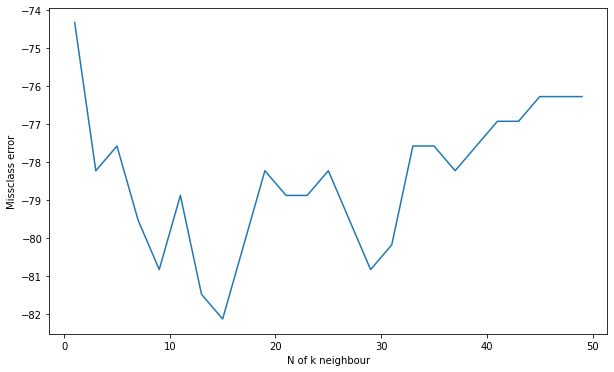

Optimal value of k is  15


In [ ]:
MSE = [1-x for x in cv_scores]
optimal_k=neighbours[MSE.index(min(MSE))]

plt.figure(figsize=(10,6))
plt.plot(neighbours,MSE)
plt.xlabel("N of k neighbour")
plt.ylabel('Missclass error')
plt.show()
print("Optimal value of k is ",optimal_k)

Accuracy: 0.8311688311688312
Precision 0.8297878591996238
Recall 0.8311688311688312


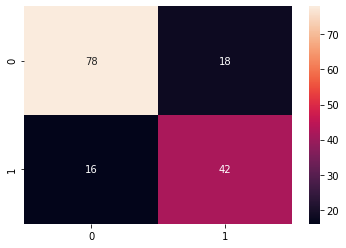

In [ ]:
# Model Accuracy: how often is the classifier correct?
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
classifier = KNeighborsClassifier(n_neighbors= 15, p= 2, metric= 'euclidean')
classifier.fit(x_train,y_train)
y_pred = classifier.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision",metrics.precision_score(y_test, y_pred, average='weighted'))
print("Recall",metrics.recall_score(y_test, y_pred, average='weighted'))

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot = True)

**Decision Tree Algorithm**: Decision Trees are a type of Supervised Machine Learning (that is you explain what the input is and what the corresponding output is in the training data) where the data is continuously split according to a certain parameter. The tree can be explained by two entities, namely decision nodes and leaves.

In [ ]:
#@title
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

Model_tree = DecisionTreeClassifier(criterion='gini', max_depth=4)
Model_tree.fit(x_train, y_train)
y_pred_tree = Model_tree.predict(x_test)

# Summary of the predictions made by the classifier
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred_tree))
# Accuracy score

print('accuracy is',accuracy_score(y_pred_tree,y_test))

[[79 17]
 [18 40]]
accuracy is 0.7727272727272727


Accuracy: 0.7727272727272727
Precision 0.7719955934823
Recall 0.7727272727272727


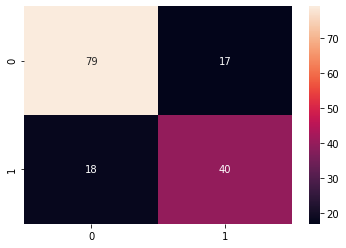

In [ ]:
# Model Accuracy: how often is the classifier correct?
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall",metrics.recall_score(y_test, y_pred_tree, average='weighted'))

sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot = True)

In [ ]:
#Hyperparameter Tuning on Decision trees

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15)}
    # decision tree model
dtree_model=DecisionTreeClassifier()
#use gridsearch to test all values
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=10)
#fit model to data
dtree_gscv.fit(x, y)
print(dtree_gscv.best_params_)


{'criterion': 'entropy', 'max_depth': 6}


In [ ]:
#@title
## Decision Tree
from sklearn.tree import DecisionTreeClassifier

Model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=6)
Model_tree.fit(x_train, y_train)
y_pred_tree = Model_tree.predict(x_test)

# Summary of the predictions made by the classifier
#print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred_tree))
# Accuracy score

print('accuracy is',accuracy_score(y_pred_tree,y_test))

[[78 18]
 [16 42]]
accuracy is 0.7792207792207793


In [ ]:
# Model Accuracy: how often is the classifier correct?
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_tree))
print("Precision",metrics.precision_score(y_test, y_pred_tree, average='weighted'))
print("Recall",metrics.recall_score(y_test, y_pred_tree, average='weighted'))

Accuracy: 0.7792207792207793
Precision 0.7809063277148384
Recall 0.7792207792207793


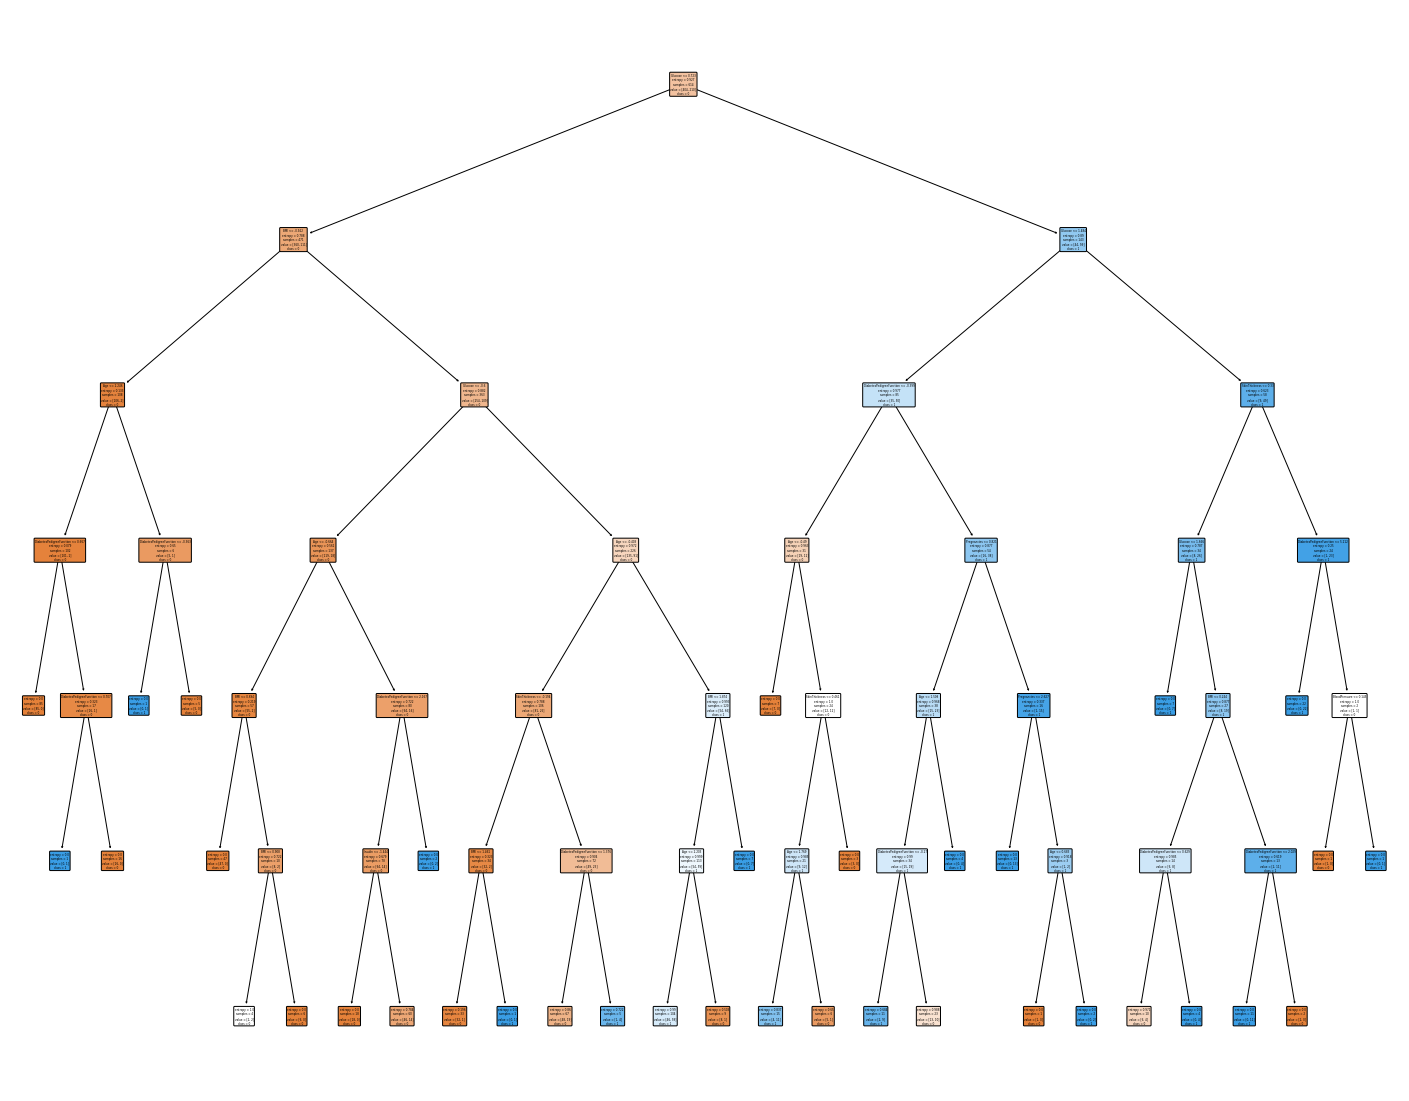

In [ ]:
from sklearn import tree
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(Model_tree,
                               feature_names=x.columns,
                               class_names=['0','1'],
                               filled=True, rounded=True)
